<a href="https://colab.research.google.com/github/Vasyl808/deepfake_video_detection/blob/main/fakeavceleb(train_test_split)_balanced_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install facenet_pytorch --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.9 MB/s eta 0:00:00


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1KdufS2RjKU0kHtc5vxm7nx8iiyL_-h2g/view?usp=sharing -O dfdc.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KdufS2RjKU0kHtc5vxm7nx8iiyL_-h2g
From (redirected): https://drive.google.com/uc?id=1KdufS2RjKU0kHtc5vxm7nx8iiyL_-h2g&confirm=t&uuid=a0cd1c24-1793-483f-9aa7-b4cbb6939982
To: /content/dfdc.zip
100% 4.44G/4.44G [01:00<00:00, 73.3MB/s]


In [ ]:
!unzip /content/dfdc.zip

Archive:  /content/dfdc.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bktkwbcawi.mp4  
  inflatin

In [49]:
import os
import json

videos = []
folders = ['/content/train_sample_videos', '/content/test_videos']
for i in range(len(folders)):
    if i == 0:
        with open("/content/train_sample_videos/metadata.json") as f:
            videos_curr = json.load(f)
            videos_curr = [((os.path.join(folders[i], video)), metadata['label']) for (video, metadata) in videos_curr.items()]
            videos += videos_curr
    else:
        with open(os.path.join("test.json")) as f:
            videos_curr = json.load(f)
            videos_curr = [((os.path.join(folders[i], video)), metadata['label']) for (video, metadata) in videos_curr.items()]
            videos += videos_curr[:246]

In [50]:
videos

[('/content/train_sample_videos/aagfhgtpmv.mp4', 'FAKE'),
 ('/content/train_sample_videos/aapnvogymq.mp4', 'FAKE'),
 ('/content/train_sample_videos/abarnvbtwb.mp4', 'REAL'),
 ('/content/train_sample_videos/abofeumbvv.mp4', 'FAKE'),
 ('/content/train_sample_videos/abqwwspghj.mp4', 'FAKE'),
 ('/content/train_sample_videos/acifjvzvpm.mp4', 'FAKE'),
 ('/content/train_sample_videos/acqfdwsrhi.mp4', 'FAKE'),
 ('/content/train_sample_videos/acxnxvbsxk.mp4', 'FAKE'),
 ('/content/train_sample_videos/acxwigylke.mp4', 'FAKE'),
 ('/content/train_sample_videos/aczrgyricp.mp4', 'FAKE'),
 ('/content/train_sample_videos/adhsbajydo.mp4', 'FAKE'),
 ('/content/train_sample_videos/adohikbdaz.mp4', 'FAKE'),
 ('/content/train_sample_videos/adylbeequz.mp4', 'FAKE'),
 ('/content/train_sample_videos/aelfnikyqj.mp4', 'REAL'),
 ('/content/train_sample_videos/aelzhcnwgf.mp4', 'FAKE'),
 ('/content/train_sample_videos/aettqgevhz.mp4', 'FAKE'),
 ('/content/train_sample_videos/aevrfsexku.mp4', 'FAKE'),
 ('/content/tr

In [51]:
import pandas as pd

df = pd.DataFrame(videos, columns=['video_path', 'label'])

# Перевірка отриманого DataFrame
print(len(df['video_path'].unique()))
print(len(df['label'].unique()))

646
2


<Axes: >

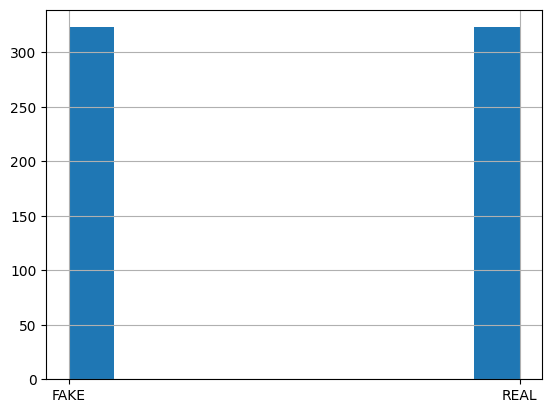

In [52]:
df['label'].hist()

In [53]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(
    df,
    test_size=0.2,  # Наприклад, 20% для тестового набору
    stratify=df['label'],  # Зберігає співвідношення класів
    random_state=42  # Для відтворюваності
)

# Перевірка кількості кожного класу у тренувальному та тестовому наборах
print("Кількість у тренувальному наборі:")
print(train_data['label'].value_counts())
print("\nКількість у тестовому наборі:")
print(test_data['label'].value_counts())

Кількість у тренувальному наборі:
label
FAKE    258
REAL    258
Name: count, dtype: int64

Кількість у тестовому наборі:
label
FAKE    65
REAL    65
Name: count, dtype: int64


In [54]:
train_data

,video_path,label
333,/content/train_sample_videos/eajlrktemq.mp4,FAKE
288,/content/train_sample_videos/dkwjwbwgey.mp4,FAKE
280,/content/train_sample_videos/diuzrpqjli.mp4,FAKE
88,/content/train_sample_videos/bbhpvrmbse.mp4,FAKE
210,/content/train_sample_videos/cmxcfkrjiv.mp4,FAKE
...,...,...
72,/content/train_sample_videos/avywawptfc.mp4,FAKE
614,/content/test_videos/oaguiggjyv.mp4,REAL
310,/content/train_sample_videos/dsdoseflas.mp4,FAKE
189,/content/train_sample_videos/cettndmvzl.mp4,FAKE


In [55]:
train_data.to_csv("train_dataset.csv", index=False)
test_data.to_csv("test_dataset.csv", index=False)

In [56]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('train_dataset.csv')


result = {}
for _, row in df.iterrows():

    file_path = row['video_path']

    label = row['label']


    result[file_path] = {
        'label': label
    }


with open('output_balenced_train.json', 'w') as json_file:
    json.dump(result, json_file)

In [57]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('test_dataset.csv')


result = {}
for _, row in df.iterrows():

    file_path = row['video_path']

    label = row['label']


    result[file_path] = {
        'label': label
    }

with open('output_balenced_test.json', 'w') as json_file:
    json.dump(result, json_file)

In [58]:
import json
from collections import Counter

# Зчитування JSON файлу
with open('output_balenced_train.json', 'r') as json_file:
    data = json.load(json_file)

# Ініціалізація лічильника для підрахунку лейблів
label_counts = Counter()

# Підрахунок кожного лейбла
for item in data.values():
    label_counts[item['label']] += 1

# Вивід розподілу лейблів
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: FAKE, Count: 258
Label: REAL, Count: 258


In [59]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil
import matplotlib.pyplot as plt
from pathlib import Path


class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_train.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, video_id, frame_idx):
        cache_path = os.path.join(self.cache_folder, f"{video_id}_frame{frame_idx}.pt") if self.cache_folder else None

        # Якщо файл з кешем існує, завантажуємо його
        if cache_path and os.path.exists(cache_path):
            return torch.load(cache_path)

        # Інакше обробляємо кадр
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)

        if boxes is None:
            return None
        else:
            box = boxes[0]
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

            # Зберігаємо оброблений кадр у кеш
            if cache_path:
                torch.save(face, cache_path)

            return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо кадри, поки не досягнемо необхідної кількості
            num_repeats = (self.n_frames) // len(frames) + 1
            frames = frames * num_repeats
            frames = frames[:self.n_frames]
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші 30 кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        video_id = os.path.splitext(os.path.basename(video))[0]
        cap = cv2.VideoCapture(video)

        frames = []
        frame_idx = 0
        while len(frames) < self.n_frames:
            ret, frame = cap.read()
            if not ret:
                break

            processed_frame = self.__process_frame(frame, video_id, frame_idx)
            if processed_frame is not None:
                frames.append(processed_frame)
            frame_idx += 1

        cap.release()
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        if self.train:
            label = 0.0
            if metadata['label'] == 'FAKE':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Label: tensor([1.], device='cuda:0')


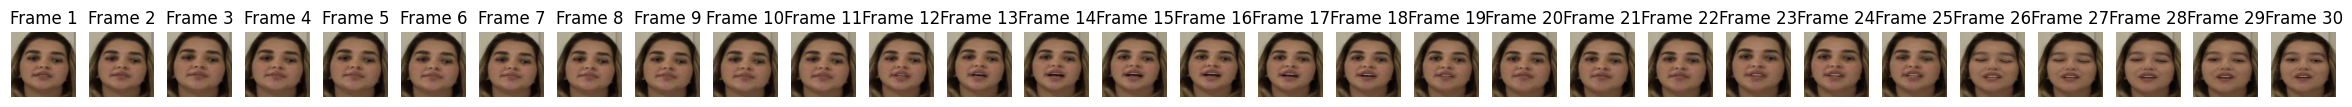

In [60]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/dfdc/']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [61]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_test.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, video_id, frame_idx):
        cache_path = os.path.join(self.cache_folder, f"{video_id}_frame{frame_idx}.pt") if self.cache_folder else None

        # Якщо файл з кешем існує, завантажуємо його
        if cache_path and os.path.exists(cache_path):
            return torch.load(cache_path)

        # Інакше обробляємо кадр
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)

        if boxes is None:
            return None
        else:
            box = boxes[0]
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

            # Зберігаємо оброблений кадр у кеш
            if cache_path:
                torch.save(face, cache_path)

            return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо кадри, поки не досягнемо необхідної кількості
            num_repeats = (self.n_frames) // len(frames) + 1
            frames = frames * num_repeats
            frames = frames[:self.n_frames]
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші 30 кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        video_id = os.path.splitext(os.path.basename(video))[0]
        cap = cv2.VideoCapture(video)

        frames = []
        frame_idx = 0
        while len(frames) < self.n_frames:
            ret, frame = cap.read()
            if not ret:
                break

            processed_frame = self.__process_frame(frame, video_id, frame_idx)
            if processed_frame is not None:
                frames.append(processed_frame)
            frame_idx += 1

        cap.release()
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        if self.train:
            label = 0.0
            if metadata['label'] == 'FAKE':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([1.], device='cuda:0')


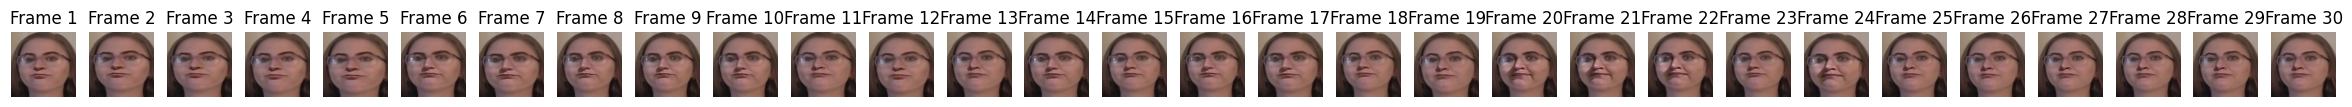

In [62]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/test_videos']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [63]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=128, num_lstm_layers=1, dropout=0.3):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b7(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Розмір виходу від feature extractor
        self.feature_output_size = 2560  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.LSTM(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            dropout=dropout,
                            batch_first=True,
                            bidirectional=True)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(2 * lstm_hidden_dim, n_linear_hidden)  # множимо на 2 через bidirectional LSTM
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для LSTM
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використання середнього значення по кадрам для об'єднання послідовності (можна також використовувати останній кадр або інші методи агрегації)
        lstm_out = torch.mean(lstm_out, dim=1)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(lstm_out))
        x = self.fc2(x)

        return x

all train folders: ['/content/dfdc'], <class 'list'>
all test folders: ['/content/test_videos'], <class 'list'>


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


start time: 2024-11-09 14:00:03.314850
using device: cuda
65


0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [17:16, 15.95s/it]


[[197  61]
 [ 80 178]]


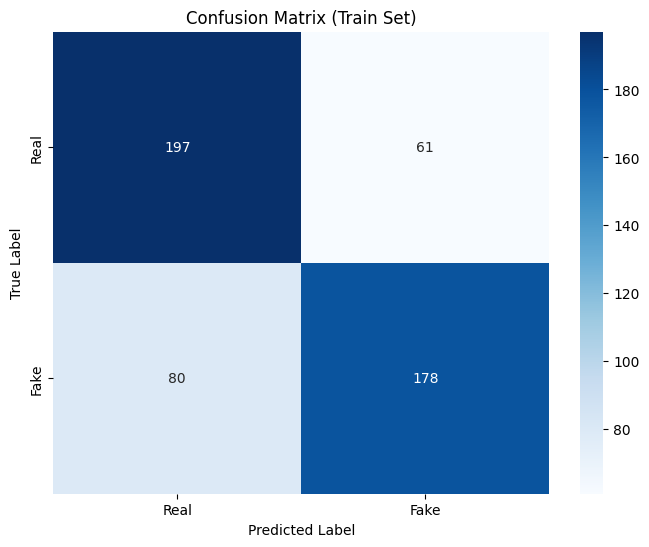

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.71      0.76      0.74       258
        Fake       0.74      0.69      0.72       258

    accuracy                           0.73       516
   macro avg       0.73      0.73      0.73       516
weighted avg       0.73      0.73      0.73       516

.................
epoch: 0, train loss: 0.5298239962412761, val loss: 2.0257976326872322, executed in: 1524.3480532169342
train total: 516, train correct: 375.0, train incorrect: 141.0, train accuracy: 0.7267441749572754
valid total: 130, valid correct: 70.0, valid incorrect: 60.0, valid accuracy: 0.5384615659713745


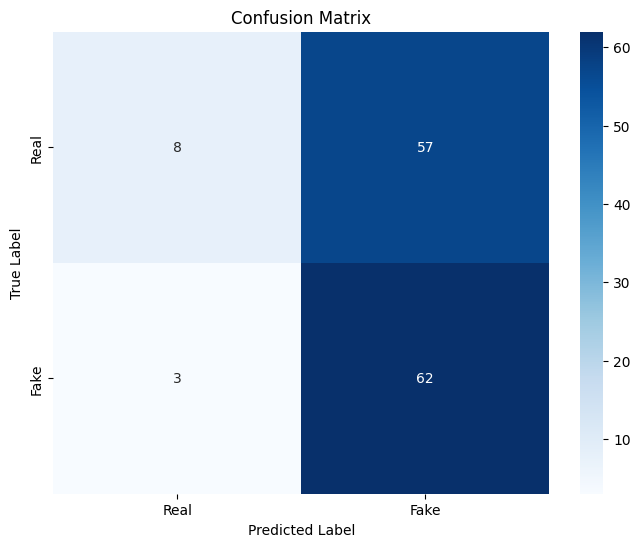

Classification Report:
              precision    recall  f1-score   support

        Real       0.73      0.12      0.21        65
        Fake       0.52      0.95      0.67        65

    accuracy                           0.54       130
   macro avg       0.62      0.54      0.44       130
weighted avg       0.62      0.54      0.44       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:54,  9.15s/it]


[[204  54]
 [ 21 237]]


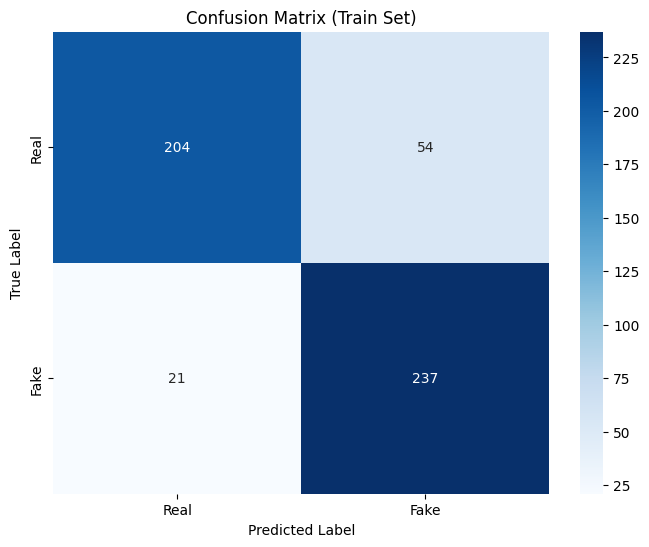

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.91      0.79      0.84       258
        Fake       0.81      0.92      0.86       258

    accuracy                           0.85       516
   macro avg       0.86      0.85      0.85       516
weighted avg       0.86      0.85      0.85       516

.................
epoch: 1, train loss: 0.3613414845787562, val loss: 1.3815997939775972, executed in: 1081.286371231079
train total: 516, train correct: 441.0, train incorrect: 75.0, train accuracy: 0.854651153087616
valid total: 130, valid correct: 79.0, valid incorrect: 51.0, valid accuracy: 0.607692301273346


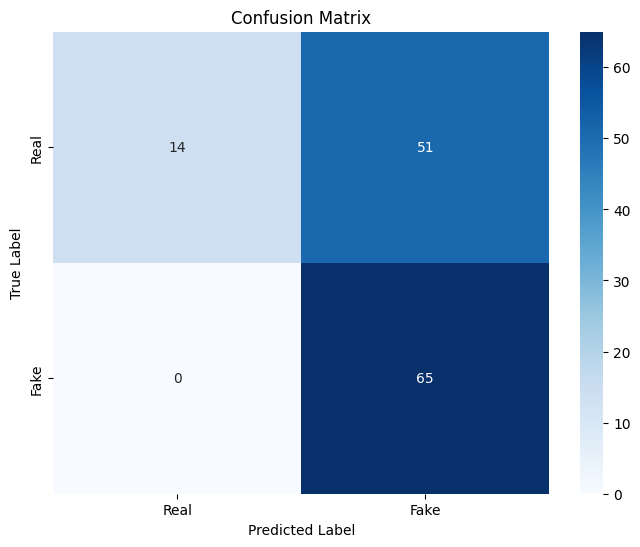

Classification Report:
              precision    recall  f1-score   support

        Real       1.00      0.22      0.35        65
        Fake       0.56      1.00      0.72        65

    accuracy                           0.61       130
   macro avg       0.78      0.61      0.54       130
weighted avg       0.78      0.61      0.54       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:58,  9.21s/it]


[[216  42]
 [ 16 242]]


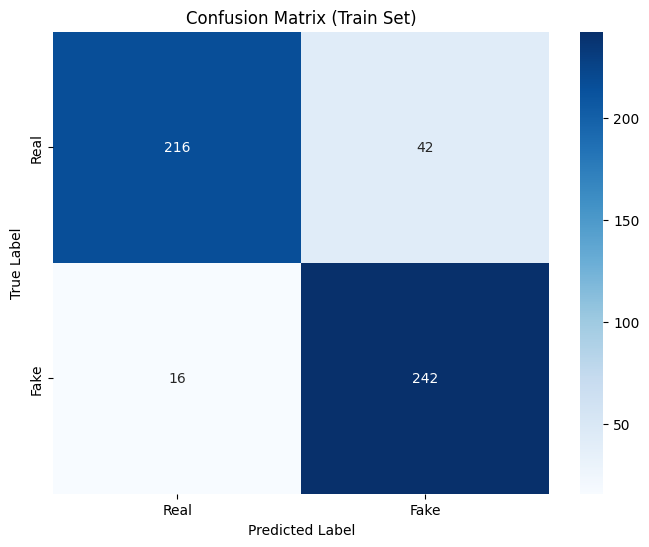

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.84      0.88       258
        Fake       0.85      0.94      0.89       258

    accuracy                           0.89       516
   macro avg       0.89      0.89      0.89       516
weighted avg       0.89      0.89      0.89       516

.................
epoch: 2, train loss: 0.26772912457012216, val loss: 1.0236701821798788, executed in: 1086.4932446479797
train total: 516, train correct: 458.0, train incorrect: 58.0, train accuracy: 0.8875969052314758
valid total: 130, valid correct: 100.0, valid incorrect: 30.0, valid accuracy: 0.7692307829856873


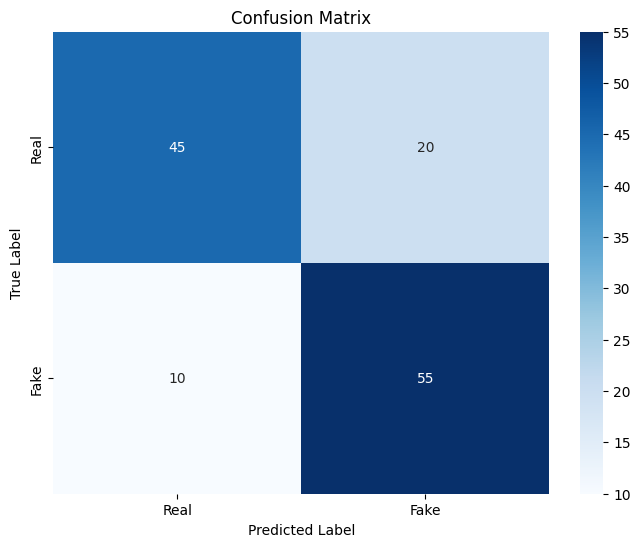

Classification Report:
              precision    recall  f1-score   support

        Real       0.82      0.69      0.75        65
        Fake       0.73      0.85      0.79        65

    accuracy                           0.77       130
   macro avg       0.78      0.77      0.77       130
weighted avg       0.78      0.77      0.77       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:56,  9.18s/it]


[[225  33]
 [ 17 241]]


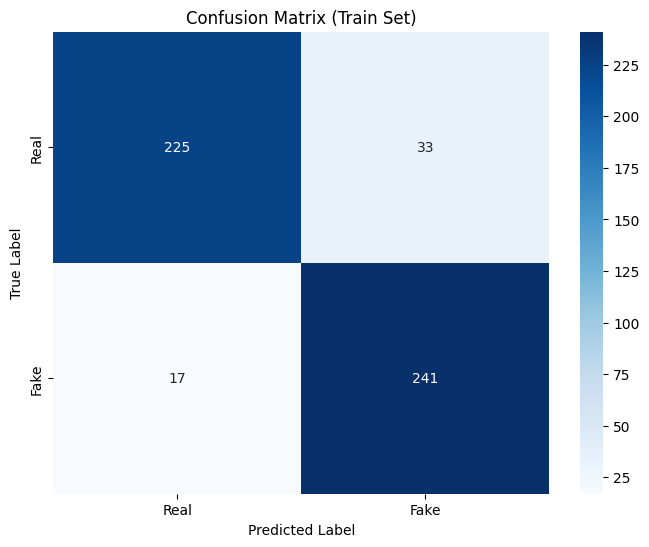

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.87      0.90       258
        Fake       0.88      0.93      0.91       258

    accuracy                           0.90       516
   macro avg       0.90      0.90      0.90       516
weighted avg       0.90      0.90      0.90       516

.................
epoch: 3, train loss: 0.23929834397366415, val loss: 0.9149642563698923, executed in: 1081.499783039093
train total: 516, train correct: 466.0, train incorrect: 50.0, train accuracy: 0.9031007885932922
valid total: 130, valid correct: 115.0, valid incorrect: 15.0, valid accuracy: 0.8846153616905212


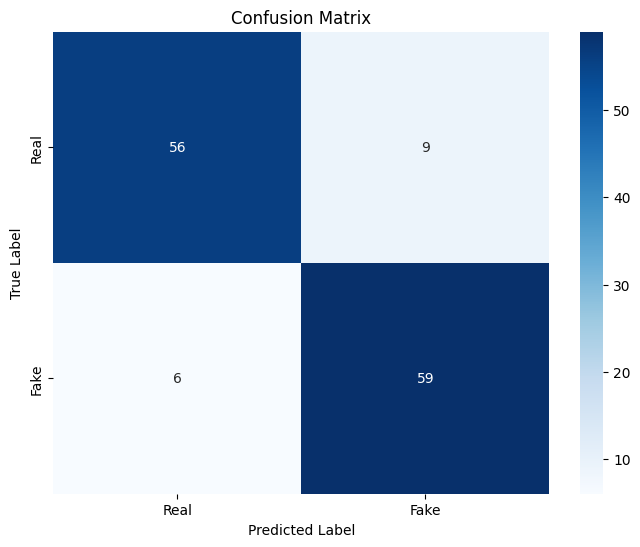

Classification Report:
              precision    recall  f1-score   support

        Real       0.90      0.86      0.88        65
        Fake       0.87      0.91      0.89        65

    accuracy                           0.88       130
   macro avg       0.89      0.88      0.88       130
weighted avg       0.89      0.88      0.88       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:52,  9.12s/it]


[[225  33]
 [ 11 247]]


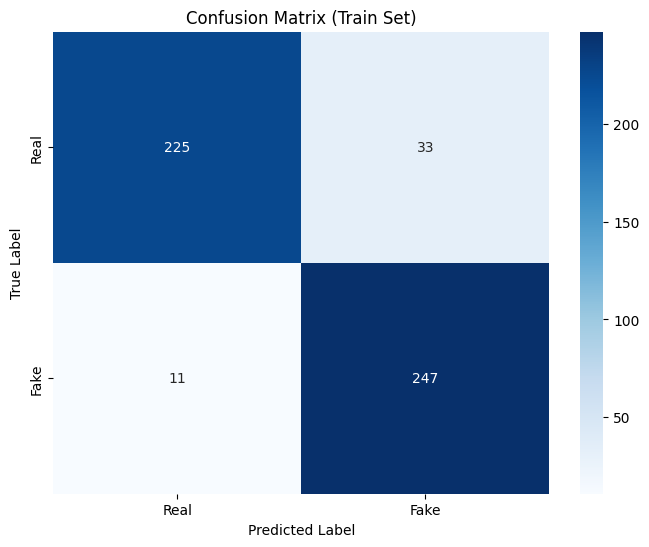

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.95      0.87      0.91       258
        Fake       0.88      0.96      0.92       258

    accuracy                           0.91       516
   macro avg       0.92      0.91      0.91       516
weighted avg       0.92      0.91      0.91       516

.................
epoch: 4, train loss: 0.21213823454454542, val loss: 0.811116779140909, executed in: 1076.603818655014
train total: 516, train correct: 472.0, train incorrect: 44.0, train accuracy: 0.9147287011146545
valid total: 130, valid correct: 116.0, valid incorrect: 14.0, valid accuracy: 0.892307698726654


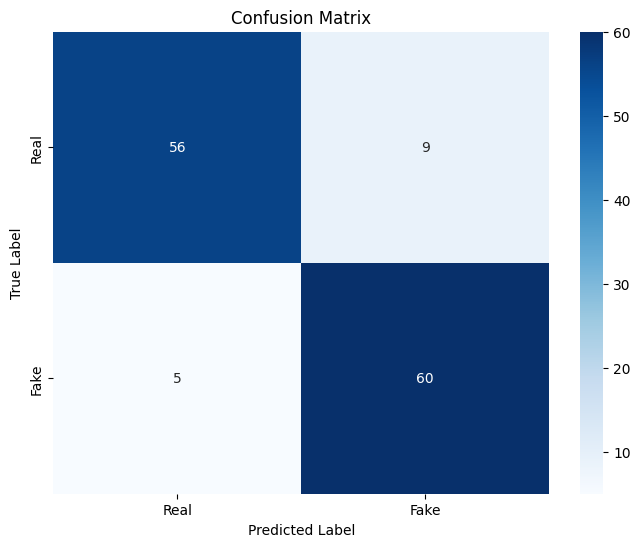

Classification Report:
              precision    recall  f1-score   support

        Real       0.92      0.86      0.89        65
        Fake       0.87      0.92      0.90        65

    accuracy                           0.89       130
   macro avg       0.89      0.89      0.89       130
weighted avg       0.89      0.89      0.89       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:52,  9.12s/it]


[[232  26]
 [ 11 247]]


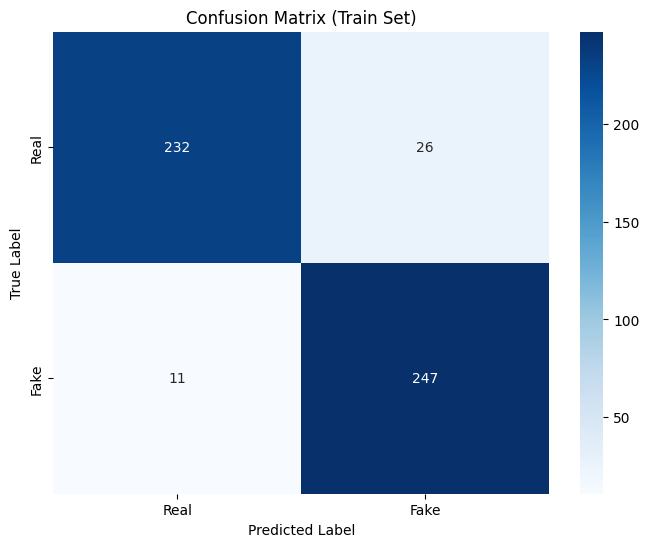

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.95      0.90      0.93       258
        Fake       0.90      0.96      0.93       258

    accuracy                           0.93       516
   macro avg       0.93      0.93      0.93       516
weighted avg       0.93      0.93      0.93       516

.................
epoch: 5, train loss: 0.17522449476214555, val loss: 0.6699760093846742, executed in: 1078.2956075668335
train total: 516, train correct: 479.0, train incorrect: 37.0, train accuracy: 0.9282945990562439
valid total: 130, valid correct: 122.0, valid incorrect: 8.0, valid accuracy: 0.9384615421295166


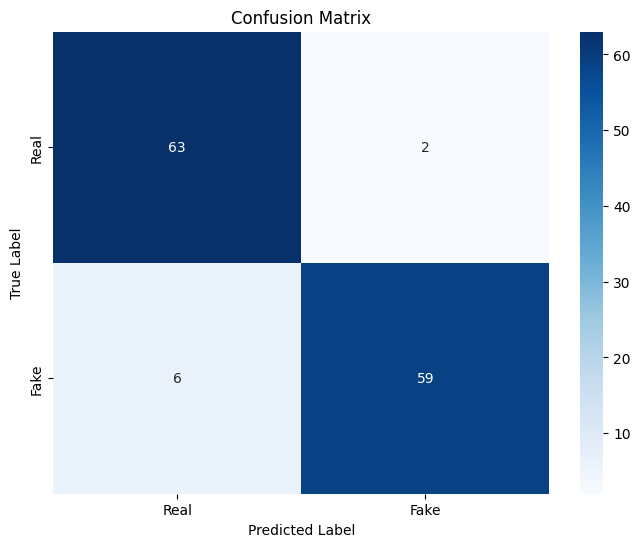

Classification Report:
              precision    recall  f1-score   support

        Real       0.91      0.97      0.94        65
        Fake       0.97      0.91      0.94        65

    accuracy                           0.94       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.94      0.94      0.94       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:53,  9.14s/it]


[[246  12]
 [ 11 247]]


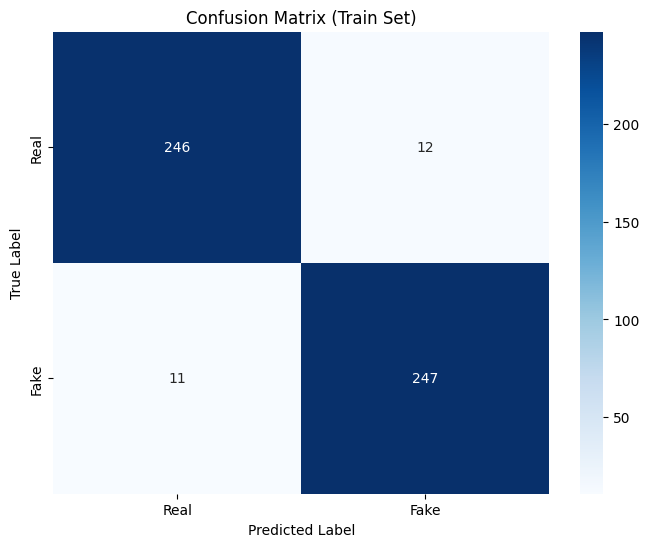

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.96      0.95      0.96       258
        Fake       0.95      0.96      0.96       258

    accuracy                           0.96       516
   macro avg       0.96      0.96      0.96       516
weighted avg       0.96      0.96      0.96       516

.................
epoch: 6, train loss: 0.1187668586579653, val loss: 0.454108577221632, executed in: 1070.9862115383148
train total: 516, train correct: 493.0, train incorrect: 23.0, train accuracy: 0.9554263353347778
valid total: 130, valid correct: 121.0, valid incorrect: 9.0, valid accuracy: 0.9307692050933838


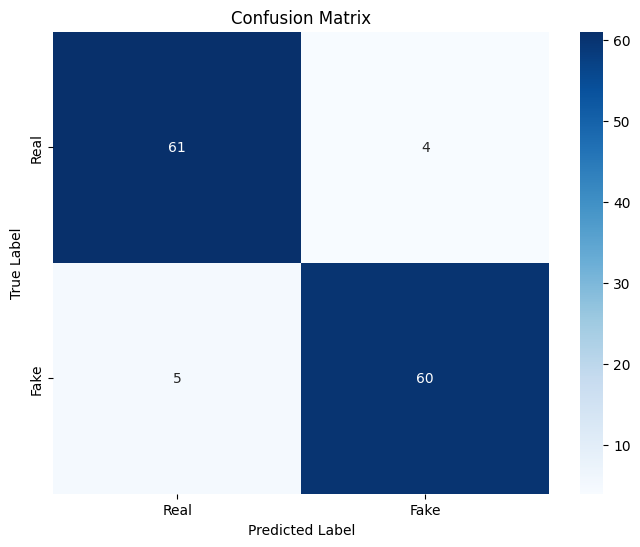

Classification Report:
              precision    recall  f1-score   support

        Real       0.92      0.94      0.93        65
        Fake       0.94      0.92      0.93        65

    accuracy                           0.93       130
   macro avg       0.93      0.93      0.93       130
weighted avg       0.93      0.93      0.93       130



0it [00:00, ?it/s]<ipython-input-59-2f058acda40f>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cache_path)
65it [09:49,  9.08s/it]


[[248  10]
 [  8 250]]


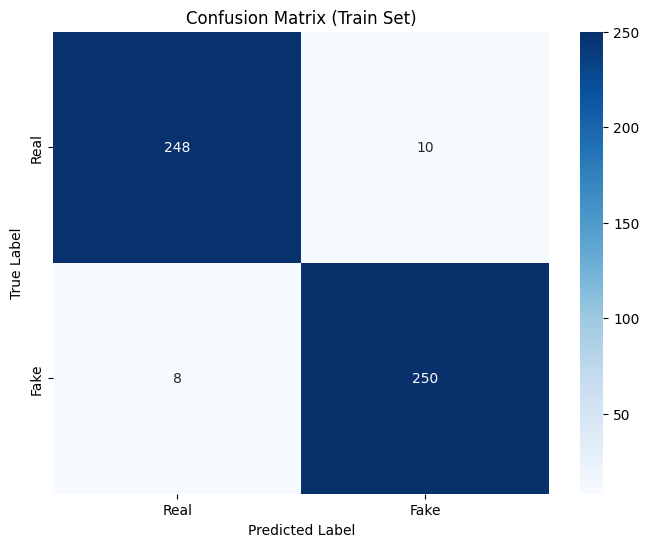

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.97      0.96      0.96       258
        Fake       0.96      0.97      0.97       258

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516

..

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


train_folders = ['/content/dfdc']
test_folders = ['/content/test_videos']

batch_size = int(8)
num_epochs = int(8)
n_frames = int(30)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

gamma = 0.1
milestones = [6,12,18]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceClassifier()
#model.load_state_dict(torch.load('/content/drive/MyDrive/b7_faces_224_b0_lstm_celebav_1_classifier_30_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))


'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_train_test_split_b7_{epoch + 1}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/dfdc_train_test_split_b7_{epoch + 1}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
